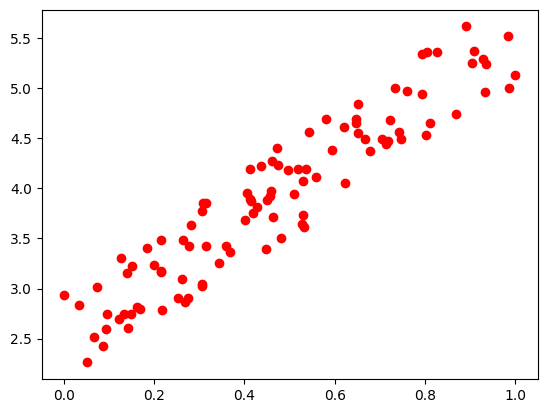

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate random data
def generate_data():
    x = np.random.rand(100, 1)
    y = 2 + 3 * x + np.random.rand(100, 1)
    return x, y

# Plot the data
def plot_data(x, y):
    plt.plot(x, y, 'ro')
    plt.show()
    
# Generate data
x, y = generate_data()

# Plot data
plot_data(x, y)

In [37]:
X = np.c_[np.ones((100, 1)), x]
Y = y

# Initialize theta randomly
theta = np.random.randn(2, 1)

print(theta)

[[-0.56557474]
 [-1.61240795]]


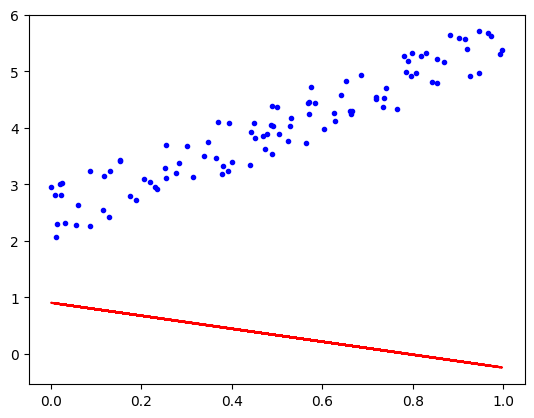

In [14]:
# plot the original data
plt.plot(x, y, "b.")
# Plot the predicted values using X and theta
y_predict = X.dot(theta)
plt.plot(x, y_predict, "r-")
plt.show()

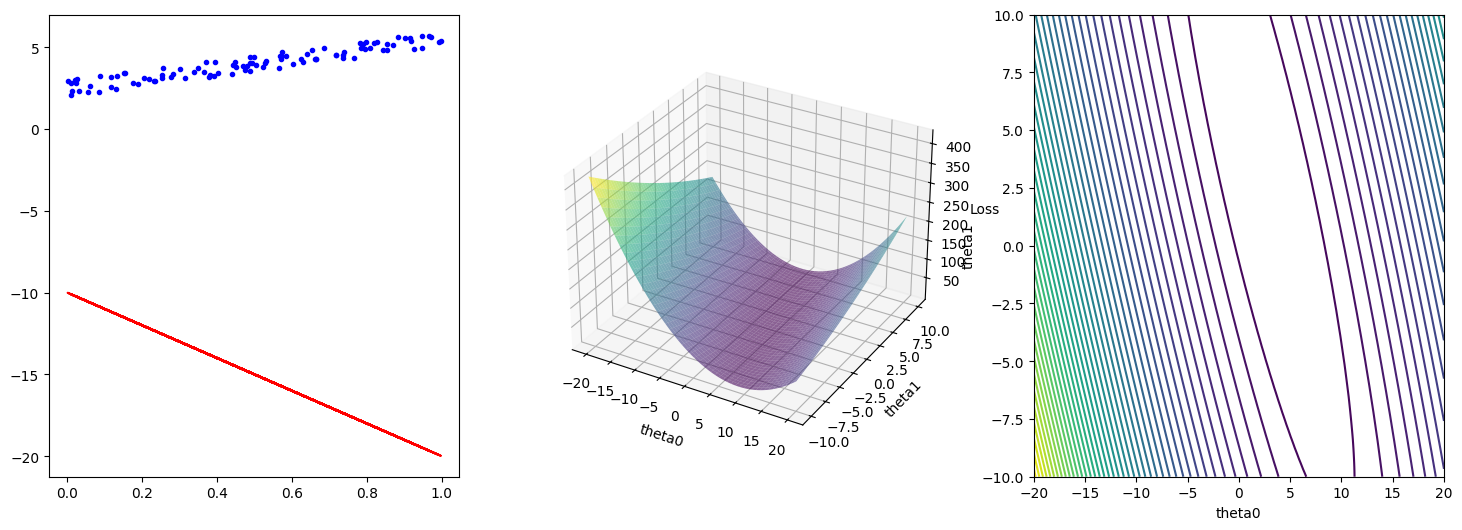

MovieWriter imagemagick unavailable; using Pillow instead.


In [28]:
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Calculate the loss gradient
def calculate_gradient(X, Y, theta):
    n = len(X)
    predictions = X.dot(theta)
    loss = predictions - Y
    gradient = 2/n * X.T.dot(loss)
    return gradient

# Initialize theta randomly
theta = np.array([[-10.0], [-10.0]])

# Prepare a grid over which to calculate the loss
theta0_vals = np.linspace(-20, 20, 100)
theta1_vals = np.linspace(-10, 10, 100)
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros_like(theta0)

# Calculate the loss over the grid
for i in range(theta0.shape[0]):
    for j in range(theta0.shape[1]):
        t = np.array([[theta0[i, j]], [theta1[i, j]]])
        J_vals[i, j] = np.sum((X.dot(t) - Y) ** 2) / (2 * len(X))

# Path traced by the algorithm and initial view angle
path = []
view_angle = -60  # Starting azimuth angle

# Plot setup with an additional subplot for contour
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)

# First subplot
ax1.plot(x, Y, "b.")
line, = ax1.plot(x, X.dot(theta), "r-")

# Second subplot for 3D surface plot
ax2.plot_surface(theta0, theta1, J_vals, cmap='viridis', alpha=0.6)
ax2.set_xlabel('theta0')
ax2.set_ylabel('theta1')
ax2.set_zlabel('Loss')
trace, = ax2.plot([], [], [], 'r-', label='Path', markersize=4)

# Third subplot for contour plot
contour = ax3.contour(theta0, theta1, J_vals, 50, cmap='viridis')
ax3.set_xlabel('theta0')
ax3.set_ylabel('theta1')
ax3.plot([], [], 'ro')  # Initial marker for the path

# Animation update function
def update(step):
    global theta, view_angle
    gradient = calculate_gradient(X, Y, theta)
    theta = theta - alpha * gradient
    line.set_ydata(X.dot(theta))
    
    # Update the path and redraw it
    loss = np.sum((X.dot(theta) - Y) ** 2) / (2 * len(X))
    path.append((theta[0, 0], theta[1, 0], loss))
    x_path, y_path, z_path = zip(*path)
    trace.set_data(x_path, y_path)
    trace.set_3d_properties(z_path)
    
    # Update the contour plot with the path
    ax3.plot(x_path, y_path, 'ro-')

    # Rotate the view
    view_angle += 0.5  # Increment the azimuth angle
    ax2.view_init(elev=40, azim=view_angle)  # Update the view angle

    return line, trace

# Animation
alpha = 0.1
n_steps = 200
ani = FuncAnimation(fig, update, frames=n_steps, blit=False, interval=100)

# To show the animation
plt.show()

# To save the animation
ani.save('animation.gif', writer='imagemagick', fps=10)

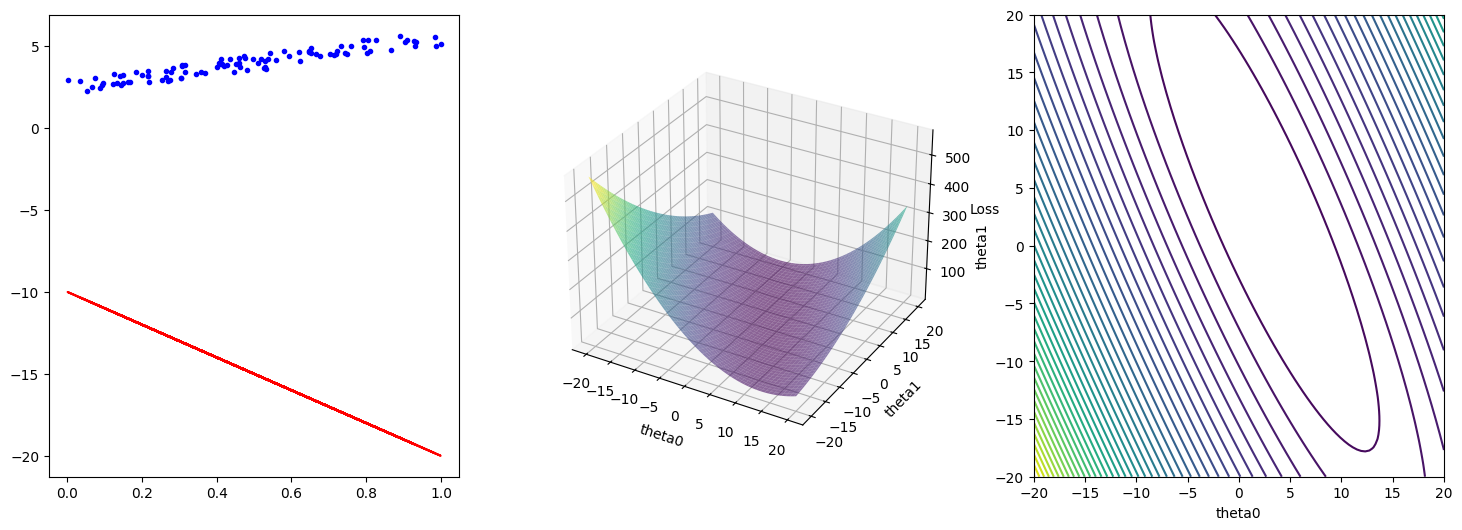

MovieWriter imagemagick unavailable; using Pillow instead.


In [39]:
# Function to calculate the gradient for one sample
def calculate_sgd_gradient(X_sample, Y_sample, theta):
    predictions = X_sample.dot(theta)
    loss = predictions - Y_sample
    gradient = 2 * X_sample.T.dot(loss)
    return gradient

# Initialize theta randomly
theta = np.array([[-10.0], [-10.0]])

# Define hyperparameters
alpha = 0.01  # Learning rate
num_epochs = 10  # Number of epochs
batch_size = 5   # Batch size for SGD

# Prepare a grid over which to calculate the loss
theta0_vals = np.linspace(-20, 20, 100)
theta1_vals = np.linspace(-20, 20, 100)
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros_like(theta0)

# Calculate the loss over the grid
for i in range(theta0.shape[0]):
    for j in range(theta0.shape[1]):
        t = np.array([[theta0[i, j]], [theta1[i, j]]])
        J_vals[i, j] = np.sum((X.dot(t) - Y) ** 2) / (2 * len(X))

# Path traced by the algorithm and initial view angle
path = []
view_angle = -60  # Starting azimuth angle

# Plot setup with an additional subplot for contour
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)

# First subplot
ax1.plot(x, Y, "b.")
line, = ax1.plot(x, X.dot(theta), "r-")

# Second subplot for 3D surface plot
ax2.plot_surface(theta0, theta1, J_vals, cmap='viridis', alpha=0.6)
ax2.set_xlabel('theta0')
ax2.set_ylabel('theta1')
ax2.set_zlabel('Loss')
trace, = ax2.plot([], [], [], 'r-', label='Path', markersize=4)

# Third subplot for contour plot
contour = ax3.contour(theta0, theta1, J_vals, 50, cmap='viridis')
ax3.set_xlabel('theta0')
ax3.set_ylabel('theta1')
ax3.plot([], [], 'ro')  # Initial marker for the path

# Update function for SGD without replacement
def update_sgd(epoch):
    global theta, view_angle
    shuffled_indices = np.random.permutation(len(X))
    line.set_ydata(X.dot(theta))
    for i in range(0, len(X), batch_size):
        batch_indices = shuffled_indices[i:i + batch_size]
        X_batch = X[batch_indices]
        Y_batch = Y[batch_indices]

        # Calculate and apply gradient
        gradient = calculate_sgd_gradient(X_batch, Y_batch, theta)
        theta = theta - alpha * gradient

    # Update the path and redraw it
    loss = np.sum((X.dot(theta) - Y) ** 2) / (2 * len(X))
    path.append((theta[0, 0], theta[1, 0], loss))
    x_path, y_path, z_path = zip(*path)
    trace.set_data(x_path, y_path)
    trace.set_3d_properties(z_path)
    
    # Update the contour plot with the path
    ax3.plot(x_path, y_path, 'ro-')

    # Rotate the view
    view_angle += 0.5  # Increment the azimuth angle
    ax2.view_init(elev=40, azim=view_angle)  # Update the view angle

    return line, trace

# Run SGD Animation
n_steps = num_epochs  # Define the total number of epochs
ani_sgd = FuncAnimation(fig, update_sgd, frames=n_steps, blit=False, interval=100)

plt.show()  # Show the animation

# Save the animation
ani_sgd.save('sgd_animation.gif', writer='imagemagick', fps=10)